Discrete RNN :

$$
\dot h_i(t) = -h_i(t) + \sum_j J_{ij} \phi(h_j(t)) + I^{\mathrm{ext}}_i(t) \\
J_{ij} = \sum_{\mu=1}^p f_\mu(\vec{z_i}) g_\mu(\vec{z_j})
$$

Neural field equations :

$$
\dot h(t, \vec z) = -h(t, \vec z) + \int \rho(\vec y) \sum_{\mu=1}^p f_\mu(\vec{z}) g_\mu(\vec{z}) \phi(h(t, \vec y)) \; \mathrm d y
$$

In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *

**Are the $\vec{z_i}$ stationary points ?**

TODO : do not explicitly compute the J matrix !! we are in low-rank !

In [112]:
def experiment1(Ns: list[int]):
	for N in Ns:
		phi = sigmoid
		J, z_samples = make_low_rank_valentin(p=1, N=N, phi=phi, random_state=42, self_connections=False)
		rnn = DiscreteRNN(J, phi, I_ext=lambda t: np.zeros_like(N))
		res = rnn.simulate_h(h0=z_samples[0], t_span=(0, 10))

		fig, axs = plt.subplots(ncols=3, figsize=(12, 4), tight_layout=True)
		for i in range(10):
			axs[2].plot(res.t, res.y[i, :])
		axs[2].set_xlabel('$t$')
		axs[2].set_ylabel('$h_i$')
		axs[2].set_title('trajectory of the first 10 neurons')
		axs[1].hist(rnn.dh(0, z_samples[0]), bins=30)
		axs[1].set_title('$\\dot h_i(\\vec z_i)$ histogram')
		axs[1].set_xlabel('$\\dot h_i$')
		im = axs[0].matshow(J, cmap='seismic')
		fig.colorbar(im, ax=axs[0])
		axs[0].set_title('$J$')
		fig.suptitle(f'{N=}, p=1')
		plt.show()

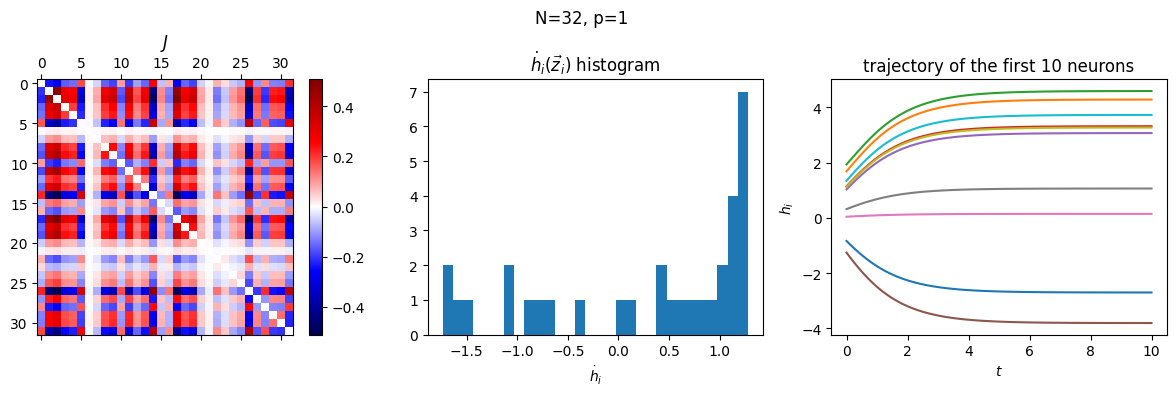

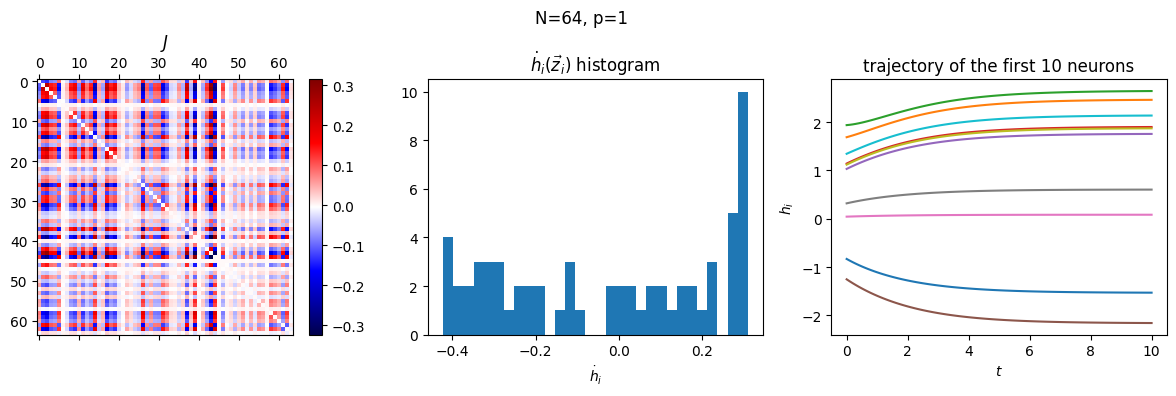

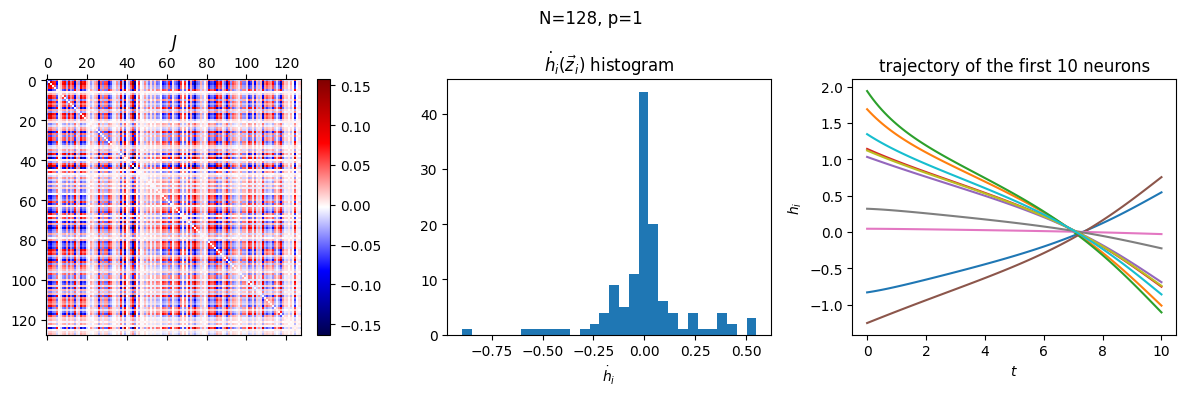

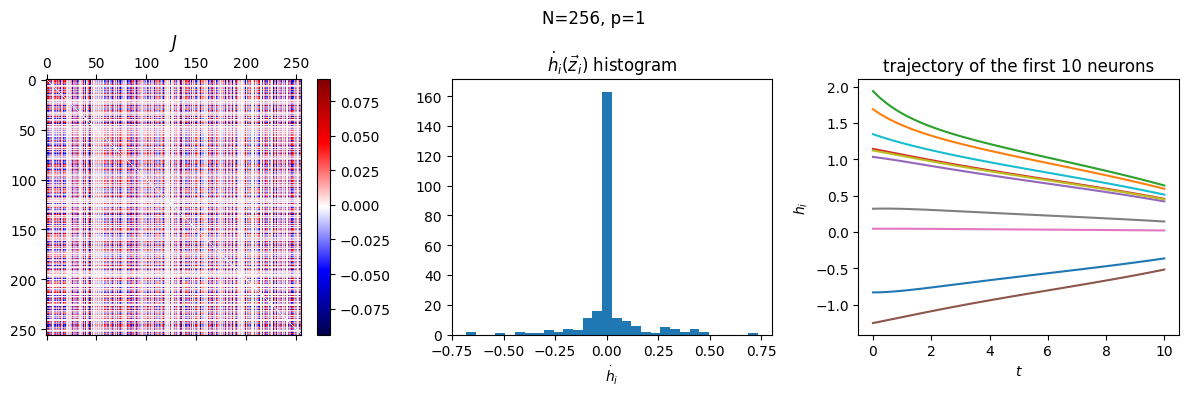

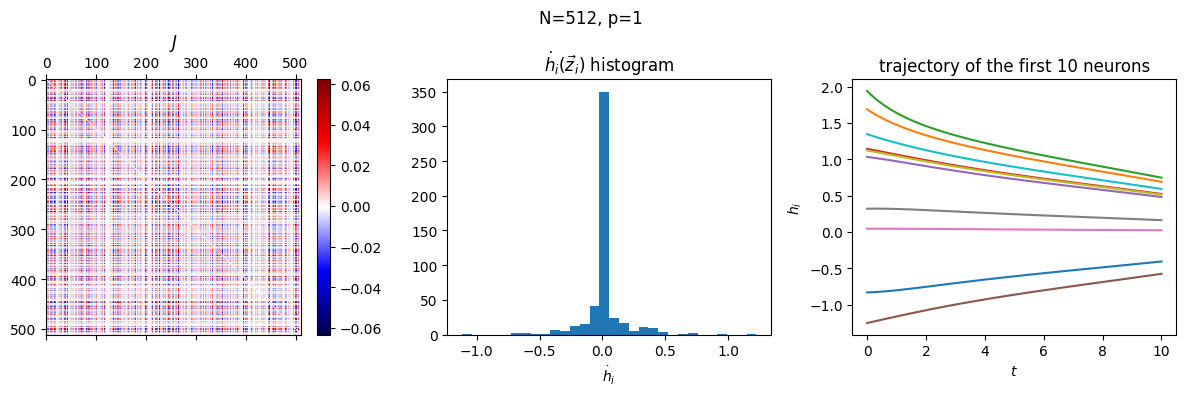

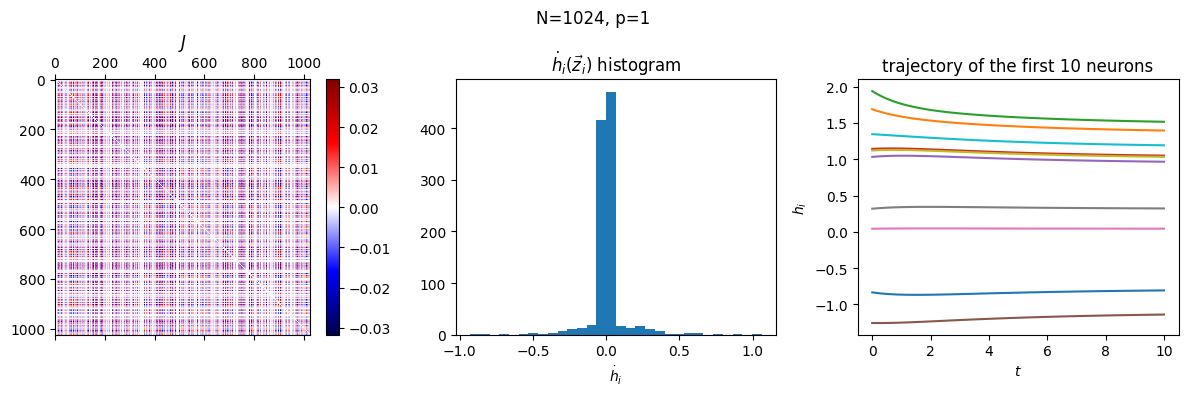

In [113]:
experiment1([32, 64, 128, 256, 512, 1024, 2048])

**Convergence to the field equations**

TODO : 
- I_ext as Weiner process

1. put the neurons in 0,1 through index
2. put the neurons in 0,1 through sorted position

getting a cycle in p=2

see photo

do not simulate the field equation, we are already sampling discretely